# Basic Exploratory Data Analysis

In this notebook I will demonstrate how to download the data and how to visualise one trip. The import statements can be seen as a default for the jupyter notebook in the cookiecutter environment. If you only want to download all the data call:

``python src\data\make_data.py``

In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
#####
#
# Default way of appending the src directory in the cookiecutter file structure
#
#####

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

   
# import my method from the source code
%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
%aimport data.preprocessing
from data.preprocessing import Preprocessor

# By loading the dotenv we can access Environment variables setted int the dm_mobility_task/.env file
# e.g. I setted there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

In [2]:
# the environment variable specified in .env
# lists the recorded data by user
token = os.environ.get("KEY_RAPHAEL")
recorded_trips = DatasetDownloader.list_recorded_data(token)
recorded_trips

,full_name,last_modified,size
0,358568053229914_20171121-144912,2017-11-21 15:00,82K
1,358568053229914_20171121-145403,2017-11-21 15:00,122K
2,358568053229914_20171127-181845,2017-11-27 18:40,605K
3,358568053229914_20171128-130428,2017-11-28 18:00,173K
4,358568053229914_20171128-163426,2017-11-28 18:00,638K
5,358568053229914_20171128-174241,2017-11-28 18:00,707K
6,358568053229914_20171130-110040,2017-11-30 11:20,647K
7,358568053229914_20171201-133422,2017-12-01 14:10,279K
8,358568053229914_20171202-201423,2017-12-02 20:40,945K
9,358568053229914_20171203-124740,2017-12-03 13:30,229K


In order to avoid too many request to the server we can use the **full_name** column to download the data and save it to data/raw, but download_data_sets(token) can also download the data per token, or all data from our team can be downloaded with download_all().

In [3]:
# download_data_sets(token) works as well, 
# but than list_recorded_data is invoked again
# we can also download all data for our team by 
#DatasetDownloader.download_all()
#tar_file_names = list(recorded_trips["full_name"] + ".csv.tar.gz")
#download_data_sets(token, file_names=tar_file_names)

The data has now been downloaded in dm_mobility_task/data/raw/token, we can check that by calling:

In [4]:
# also possible for specific token
# get_file_names(os.path.join(get_data_dir(),"raw"), token=token)
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))
recorded_file_names

We have recorded: 61 trips


['355007075245007/355007075245007_20171108-110713.csv.tar.gz',
 '355007075245007/355007075245007_20171108-132646.csv.tar.gz',
 '355007075245007/355007075245007_20171121-140720.csv.tar.gz',
 '355007075245007/355007075245007_20171121-141338.csv.tar.gz',
 '355007075245007/355007075245007_20171211-134806.csv.tar.gz',
 '355007075245007/355007075245007_20171211-142244.csv.tar.gz',
 '355007075245007/355007075245007_20171211-143821.csv.tar.gz',
 '355007075245007/355007075245007_20171211-145026.csv.tar.gz',
 '355007075245007/355007075245007_20171212-154920.csv.tar.gz',
 '355007075245007/355007075245007_20171212-164319.csv.tar.gz',
 '358568053229914/358568053229914_20171121-144912.csv.tar.gz',
 '358568053229914/358568053229914_20171121-145403.csv.tar.gz',
 '358568053229914/358568053229914_20171127-181845.csv.tar.gz',
 '358568053229914/358568053229914_20171128-130428.csv.tar.gz',
 '358568053229914/358568053229914_20171128-163426.csv.tar.gz',
 '358568053229914/358568053229914_20171128-174241.csv.t

Now that the data has been downloaded, we can read it from file and start to explore it. I will here only explore data from my key, but with get_data_per_trip(dir_name="raw") it is possible to load all **raw** data per trip in memory.

In [16]:
#from data.preprocessing import Preprocessor as pc
# read data per trip by for all users by invoking: get_data_per_trip(dir_name="raw")
#dfs=pc.get_data_per_trip(dir_name="raw")
dfs = Preprocessor.get_data_per_token('355007075245007')

In [6]:
myDf = dfs[0]['sensor']
mySet = set(myDf['sensor'])
mySet

{'acceleration', 'gyroscope', 'linacc', 'magnetic', 'rotation'}

In [7]:
dfs[0]['sensor']

,sensor,time,x,y,z,total
0,acceleration,1510229987055,-0.604904,2.676270,8.625931,9.051796
1,acceleration,1510229987067,-0.592941,2.871277,9.240875,9.694822
2,magnetic,1510229987064,-14.334106,-17.369080,-2.752686,22.687635
3,acceleration,1510229987075,-0.603714,2.852142,9.366501,9.809715
4,acceleration,1510229987085,-0.600128,2.813843,9.447861,9.876230
5,magnetic,1510229987081,-14.382935,-17.369080,-2.362061,22.674501
6,acceleration,1510229987098,-0.579788,2.792313,9.524429,9.942229
7,acceleration,1510229987106,-0.592941,2.792313,9.602203,10.017529
8,magnetic,1510229987098,-14.285278,-18.003845,-2.899170,23.164906
9,magnetic,1510229987114,-14.529419,-17.564392,-2.801514,22.966505


In [128]:
lel = Preprocessor.refactor_to_common_hertz_rate(dfs)

Frame  0
checking sensor:  rotation
length of array before:  90061


/Users/moritz/anaconda/envs/datamining/lib/python3.6/site-packages/pyts/utils/utils.py:63: RuntimeWarning: overflow encountered in short_scalars
  return np.arange(array[0], array[1])


length of array after:  90061
length of array before:  90061
length of array after:  90061
length of array before:  90061
length of array after:  90061
length of array before:  90061
length of array after:  90061
checking sensor:  linacc
length of array before:  90067
length of array after:  90067
length of array before:  90067
length of array after:  90067
length of array before:  90067
length of array after:  90067
length of array before:  90067
length of array after:  90067
checking sensor:  gyroscope
length of array before:  90077
length of array after:  90077
length of array before:  90077
length of array after:  90077
length of array before:  90077
length of array after:  90077
length of array before:  90077
length of array after:  90077
checking sensor:  acceleration
length of array before:  90080
length of array after:  90080
length of array before:  90080
length of array after:  90080
length of array before:  90080
length of array after:  90080
length of array before:  90080
l

length of array after:  78427
length of array before:  78427
length of array after:  78427
length of array before:  78427
length of array after:  78427
checking sensor:  magnetic
length of array before:  77727
length of array after:  77727
length of array before:  77727
length of array after:  77727
length of array before:  77727
length of array after:  77727
length of array before:  77727
length of array after:  77727
            time         x         y        z    sensor
0  1512998565472  0.175542  0.218064  0.63509  rotation
Frame  6
checking sensor:  rotation
length of array before:  72105
length of array after:  72105
length of array before:  72105
length of array after:  72105
length of array before:  72105
length of array after:  72105
length of array before:  72105
length of array after:  72105
checking sensor:  linacc
length of array before:  72107
length of array after:  72107
length of array before:  72107
length of array after:  72107
length of array before:  72107
length 

In [132]:
def print_large_diff(df):
    for i in range(1, len(df['time'])):
        now = df['time'][i]
        past = df['time'][i-1]
        if (now-past).total_seconds() > 1:
            print("large diff @",i, "now-past = ", now-past)

In [133]:
roh = lel[6]['sensor']
roh = roh[roh['sensor'] == 'acceleration']
roh = Preprocessor.convert_timestamps(roh)

print_large_diff(roh)

print(len(roh))
print("start: " , min(roh['time']))
print("stop: " , max(roh['time']))

large diff @ 6554 now-past =  0 days 00:01:05.891000
14424
start:  2017-12-11 13:38:21.937000
stop:  2017-12-11 13:50:23.080000


In [135]:
roh.head(40)

,time,x,y,z,sensor
0,2017-12-11 13:38:21.937,-0.734721,3.997269,9.612720,acceleration
1,2017-12-11 13:38:21.987,-0.734721,3.997269,9.612720,acceleration
2,2017-12-11 13:38:22.038,-0.593463,4.065983,9.605058,acceleration
3,2017-12-11 13:38:22.090,-0.498892,4.091242,10.170568,acceleration
4,2017-12-11 13:38:22.140,-0.498892,4.091242,10.170568,acceleration
5,2017-12-11 13:38:22.190,-0.498892,4.091242,10.170568,acceleration
6,2017-12-11 13:38:22.240,-0.494103,4.123564,10.203010,acceleration
7,2017-12-11 13:38:22.290,-0.349613,4.072806,9.998665,acceleration
8,2017-12-11 13:38:22.340,-0.172921,4.229627,9.847591,acceleration
9,2017-12-11 13:38:22.391,-0.190519,4.275835,9.968259,acceleration


In [134]:
hint = dfs[6]['sensor']
hint = hint[hint['sensor'] == 'acceleration']
hint = Preprocessor.convert_timestamps(hint)
print(len(hint))
print("start: " , min(hint['time']))
print("stop: " , max(hint['time']))
hint.reset_index(drop=True,inplace=True)
hint

72120
start:  2017-12-11 13:38:21.917000
stop:  2017-12-11 13:50:23.111000


,time,sensor,x,y,z,total
0,2017-12-11 13:38:21.917,acceleration,-0.734721,3.997269,9.612720,10.436587
1,2017-12-11 13:38:21.928,acceleration,-0.734721,3.997269,9.612720,10.436587
2,2017-12-11 13:38:21.938,acceleration,-0.734721,3.997269,9.612720,10.436587
3,2017-12-11 13:38:21.948,acceleration,-0.734721,3.997269,9.612720,10.436587
4,2017-12-11 13:38:21.958,acceleration,-0.734721,3.997269,9.612720,10.436587
5,2017-12-11 13:38:21.967,acceleration,-0.734721,3.997269,9.612720,10.436587
6,2017-12-11 13:38:21.977,acceleration,-0.734721,3.997269,9.612720,10.436587
7,2017-12-11 13:38:21.987,acceleration,-0.734721,3.997269,9.612720,10.436587
8,2017-12-11 13:38:21.998,acceleration,-0.734721,3.997269,9.612720,10.436587
9,2017-12-11 13:38:22.008,acceleration,-0.734721,3.997269,9.612720,10.436587


In [124]:
print_large_diff(hint)

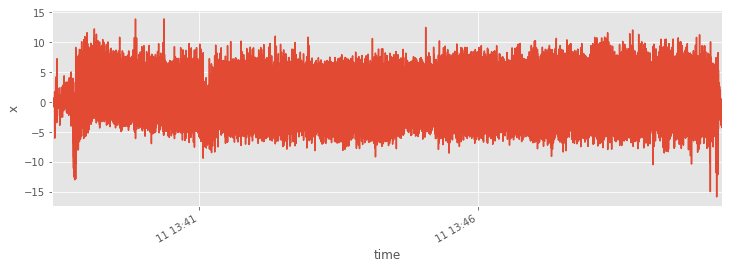

In [136]:
acceleration = hint
acceleration = acceleration.set_index("time")
#all_sensors_resampled[all_sensors_resampled["sensor"] == "acceleration"]
figsize=(12, 4)
#test12.iloc[10:32,:]['x'].plot(figsize=figsize);
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

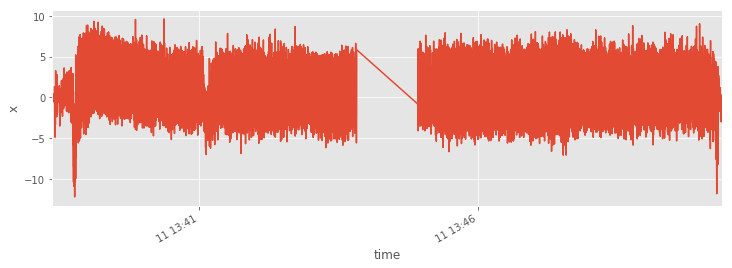

In [137]:
#test12 = Preprocessor.convert_timestamps(lel[i]['sensor'])
#test12 = test12[test12['sensor'] == 'acceleration']
acceleration = roh
acceleration = acceleration.set_index("time")
#all_sensors_resampled[all_sensors_resampled["sensor"] == "acceleration"]
figsize=(12, 4)
#test12.iloc[10:32,:]['x'].plot(figsize=figsize);
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

In [127]:
roh

,time,x,y,z,sensor
0,2017-12-11 13:38:22.013,-0.640449,4.037941,9.750266,acceleration
1,2017-12-11 13:38:22.215,-0.460375,4.094713,10.135703,acceleration
2,2017-12-11 13:38:22.415,-0.172083,4.252431,9.880302,acceleration
3,2017-12-11 13:38:22.615,0.139193,4.661211,9.720878,acceleration
4,2017-12-11 13:38:22.815,-0.200275,4.404373,9.881349,acceleration
5,2017-12-11 13:38:23.015,-0.117675,4.358854,9.904962,acceleration
6,2017-12-11 13:38:23.215,-0.051894,4.444985,9.837625,acceleration
7,2017-12-11 13:38:23.415,-0.041031,4.428256,9.743473,acceleration
8,2017-12-11 13:38:23.615,-0.063147,4.424784,9.829545,acceleration
9,2017-12-11 13:38:23.815,0.077901,4.316207,10.072556,acceleration


In [10]:
from copy import deepcopy
# new dict
newDict = deepcopy(dfs)

for i in range(0, len(newDict)):
    
    #get single trip
    sensor_trip = newDict[i]['sensor']
    
    #get all sensors
    sensor_set = set(sensor_trip['sensor'])
    #print(sensor_trip[sensor_trip['sensor'] == 'acceleration'])
    #create new data frame
    helper = pd.DataFrame()

    for sensor in sensor_set:
        sensor_data = sensor_trip[sensor_trip['sensor'] == sensor]
        sensor_data = sensor_data.drop(['sensor', 'total'], axis=1)
        
        # Necessary to reset index
        sensor_data.reset_index(drop=True,inplace=True)
        # override
        #print(sensor_data.head())
        sensor_data = Preprocessor.approx_sensor(sensor_data, 20)
        sensor_data['sensor'] = sensor

        helper = pd.concat([helper,sensor_data])
        #print(helper.head())
    newDict[i]['sensor'] = helper

#for j in range(0, len(newDict)):
    
#    t = Preprocessor.normalize_trip(newDict[j]['sensor'])
    #print(t.head())
    #newDict[j]['sensor'] = 

In [11]:
t = Preprocessor.normalize_trip(newDict[0][''])

KeyError: ''

In [ ]:
test1 = dfs[0]['sensor']
test2 = sensor_data

test11 = test1[test1['sensor'] == 'acceleration']

print(test11.head())
print(test2.head())

In [ ]:
newDict[2]['sensor']

In [ ]:
len(dfs)

In [ ]:
#sample=approx_sensor(acc, 100)
#df = pd.DataFrame([ay,ax], columns=['test','lel'])


In [ ]:
storage = list()
for frame in dfs:
    sensor_data = frame['sensor']
    acc = sensor_data[sensor_data['sensor'] == 'acceleration']
    acc = acc.drop(['sensor', 'total'], axis=1)
    # NECESSARY!!!!!!!
    acc.reset_index(drop=True,inplace=True)
    storage.append(Preprocessor.approx_sensor(acc, 20))

#### PAA ####

Requirements:
    1) pyts
    2) future
    3) scipy

1) prepare data

In [ ]:
sensor_data = dfs[0]['sensor']
sensor_data = sensor_data[sensor_data['sensor'] == 'acceleration']
sensor_data.drop(['sensor', 'total'], axis=1)
# Necessary to reset index
sensor_data.reset_index(drop=True,inplace=True)
sensor_data.head()

2) interpolate data

In [ ]:
new_sensor_data = Preprocessor.approx_sensor(sensor_data, 20)
new_sensor_data.head()

check if 20 trips per second

In [ ]:
print(datetime.fromtimestamp(new_sensor_data['time'][0] / 1e3))
print(datetime.fromtimestamp(new_sensor_data['time'][19] / 1e3))
print(datetime.fromtimestamp(new_sensor_data['time'][39] / 1e3))
print(datetime.fromtimestamp(new_sensor_data['time'][59] / 1e3))

3) perform PAA

In [ ]:
paa_df = Preprocessor.normalize_trip(new_sensor_data, w_size=20)
paa_df.head()

4) check if distance is correct (now every entry should span a second)

In [ ]:
print("paa_df has size:", len(paa_df))
print("second:",datetime.fromtimestamp(paa_df['time'][0] / 1e3))
print("second:",datetime.fromtimestamp(paa_df['time'][1] / 1e3))
print("second:",datetime.fromtimestamp(paa_df['time'][2] / 1e3))
print("second:",datetime.fromtimestamp(paa_df['time'][3] / 1e3))
print("second:",datetime.fromtimestamp(paa_df['time'][4] / 1e3))

5) optional: print PAA result

In [ ]:
Preprocessor.plot_paa(np.array(new_sensor_data['x'].head(200)), w_size=20)

Dismiss dataframes w/o annotation and less than 10 minutes long (see https://github.com/univie-datamining-team3/assignment2/issues/7).

In [ ]:
# 1. Get travel data per token, remove dataframes without annotations.
dfs = Preprocessor._remove_dataframes_without_annotation(dfs)

# 2. Remove trips less than 10 minutes long.
dfs = Preprocessor._remove_dataframes_by_duration_limit(dfs, 10 * 60)

The data can now be accessed in the following way. Enter one of the following valid names as key in the dictionary:


In [ ]:
DatasetDownloader.VALID_NAMES

E.g. for the sensor data:

In [ ]:
trip_nr = 0
dfs[trip_nr]["sensor"].head(10)

Get summaries for each recorded trip:

In [ ]:
Preprocessor.get_trip_summaries(dfs, convert_time=True)

Next we are visualizing the acceleration data:

In [ ]:
acceleration_df = dfs[trip_nr]["sensor"]
acceleration_df = acceleration_df[acceleration_df["sensor"]=="acceleration"]
acceleration_df.head(3)

Quick visualisation of the acceleration of one of my trips

In [ ]:
small = acceleration_df.drop(["sensor","total"],axis=1).set_index("time")
figsize=(12, 4)
small["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

small["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

small["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();



**Plot the gps data on a google map and save it as html to disk:**

In [ ]:
location_df = dfs[trip_nr]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [ ]:
os.path.join("reports","maps",file_name)

----
**Apply resampling in new time interval for coarser granularity**

The following csv files include time columns: cell, event, location, marker, sensor.

Lets see an example for the acceleration data for one trip. First we have to convert the integer timestamps int the time column to datetime objects. This can be done via the convert_timestamps function.

In [ ]:
acceleration_df = dfs[trip_nr]["sensor"]
acceleration_df = acceleration_df[acceleration_df["sensor"]=="acceleration"]
acceleration_df = Preprocessor.convert_timestamps(acceleration_df)
acceleration_df.head()

Next we can downsample the acceleration data from milliseconds to a 1 second interval, where the new aggregated values are aggregated via the mean. 

**Note** that this drops the sensor column and the sensor column has to be reappended. This is not an issue here because we have only one sensor type. If you want to keep the categorical variable, see next point.

In [ ]:
acceleration_df_resampled = Preprocessor.downsample_time_series(acceleration_df, time_interval="1S")
acceleration_df_resampled.head()

Another possibility were we can keep all the categorical values is by using the downsample_time_series_per_category function, here shown for full sensor table.

**Note** that here we did not convert the time column for dfs[trip_nr] before, thats why this step is also done implicitly, otherwise the resampling does not work.

In [ ]:
dfs[trip_nr]["sensor"].head()

In [ ]:
all_sensors_resampled = Preprocessor.downsample_time_series_per_category(dfs[trip_nr]["sensor"],
                                                                         categorical_colnames=["sensor"])

all_sensors_resampled.head()

If we now once again plot the acceleration for the resampled version we get:

In [ ]:
small = acceleration_df_resampled
figsize=(12, 4)
small["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

small["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

small["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();